In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import pywt

plt.rcParams['figure.figsize'] = [16,16]
plt.rcParams.update({'font.size': 22})

A = imread(os.path.join('car.webp'))
B = np.mean(A,-1)


array([[235.33333333, 235.33333333, 235.33333333, ...,  44.66666667,
         45.        ,  45.        ],
       [235.33333333, 235.33333333, 235.33333333, ...,  44.66666667,
         45.        ,  45.        ],
       [235.33333333, 235.33333333, 235.33333333, ...,  44.66666667,
         45.        ,  45.        ],
       ...,
       [ 60.33333333,  60.33333333,  60.33333333, ..., 115.        ,
        115.        , 114.        ],
       [ 60.33333333,  60.33333333,  60.33333333, ..., 115.        ,
        115.        , 114.        ],
       [ 60.33333333,  60.33333333,  60.33333333, ..., 114.        ,
        114.        , 112.66666667]])

In [32]:
print(pywt.families(short=False))
print()
# Currently the built-in families are:

    # Haar (haar)
    # Daubechies (db)
    # Symlets (sym)
    # Coiflets (coif)
    # Biorthogonal (bior)
    # Reverse biorthogonal (rbio)
    # “Discrete” FIR approximation of Meyer wavelet (dmey)
    # Gaussian wavelets (gaus)
    # Mexican hat wavelet (mexh)
    # Morlet wavelet (morl)
    # Complex Gaussian wavelets (cgau)
    # Shannon wavelets (shan)
    # Frequency B-Spline wavelets (fbsp)
    # Complex Morlet wavelets (cmor)

print(pywt.wavelist(family=None, kind='all'))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp

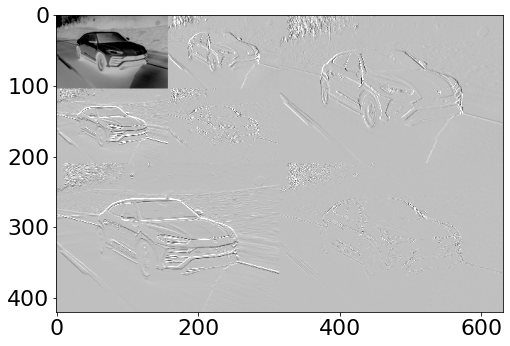

<Figure size 1296x1152 with 0 Axes>

In [48]:
n = 2
#w = 'db36'
w = 'haar'
#w = 'gaus'
coeffs = pywt.wavedec2(B, wavelet = w ,level = n)

# normalizing the coefficient array
coeffs[0]/=np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level+1]]

arr,coeff_slices = pywt.coeffs_to_array(coeffs)

plt.imshow(arr,cmap='gray_r',vmin=-0.25,vmax=0.75)
plt.rcParams['figure.figsize'] = [16,16]
fig = plt.figure(figsize=[18,16])
plt.show()

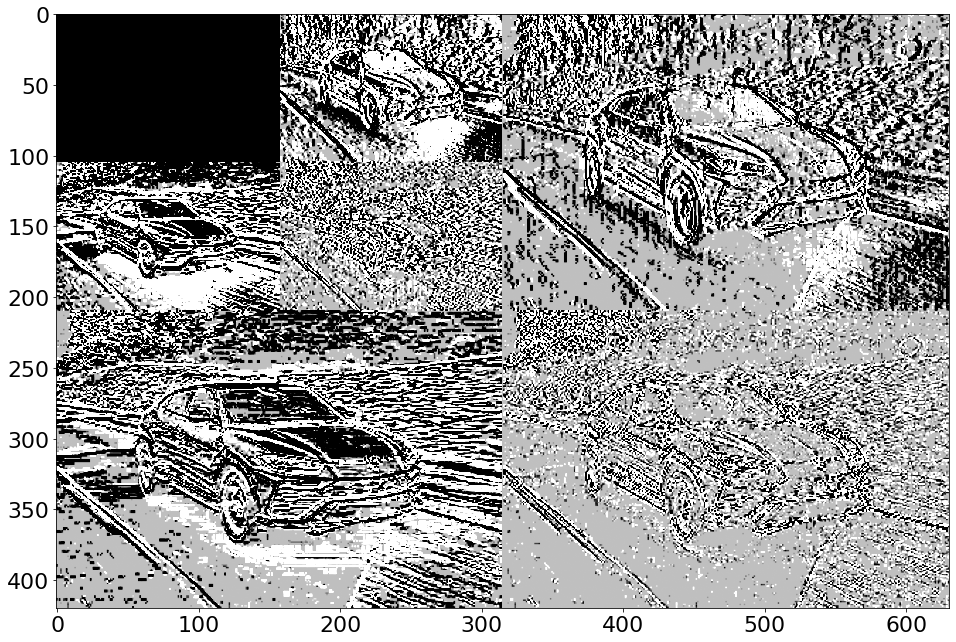

<Figure size 1296x1152 with 0 Axes>

In [49]:
coeffs = pywt.wavedec2(B, wavelet = w ,level = n)

arr,coeff_slices = pywt.coeffs_to_array(coeffs)

plt.imshow(arr,cmap='gray_r',vmin=-0.25,vmax=0.75)
plt.rcParams['figure.figsize'] = [16,16]
fig = plt.figure(figsize=[18,16])
plt.show()

<IPython.core.display.Javascript object>


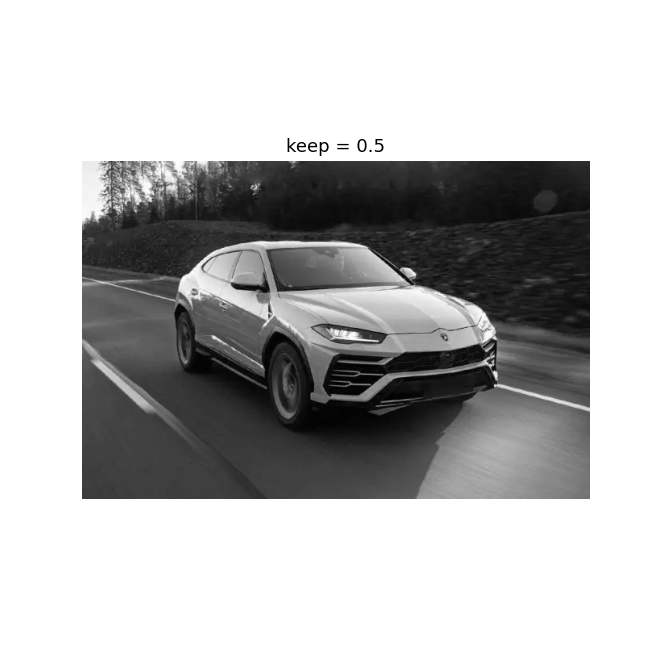

<IPython.core.display.Javascript object>


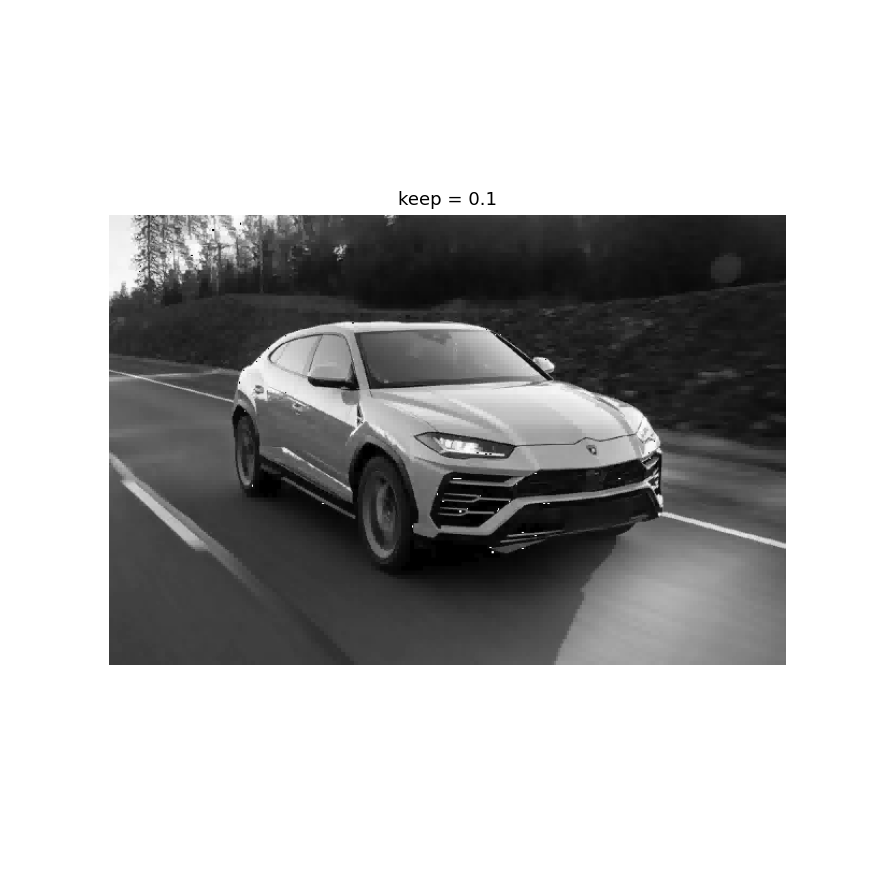

<IPython.core.display.Javascript object>


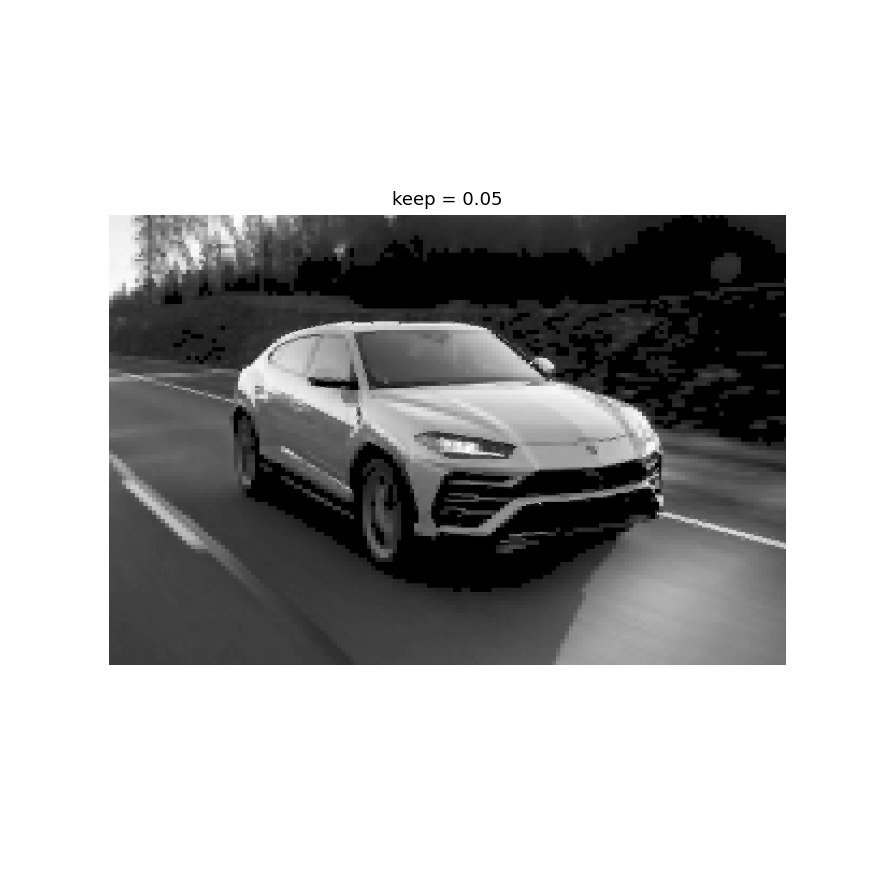

<IPython.core.display.Javascript object>


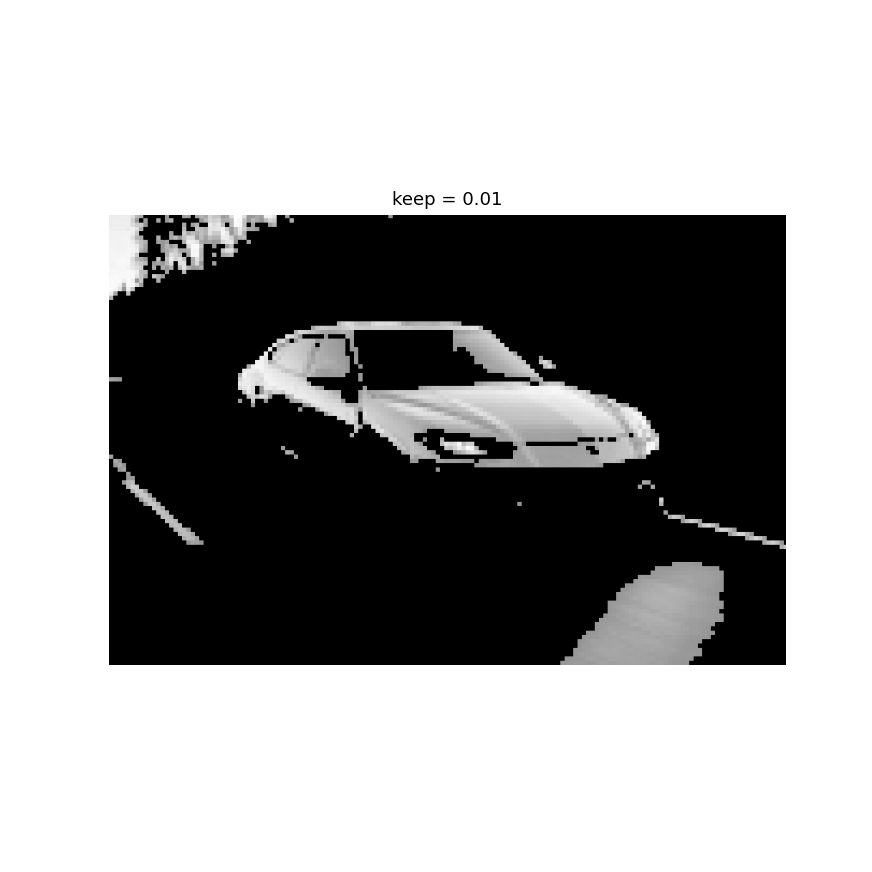

<IPython.core.display.Javascript object>


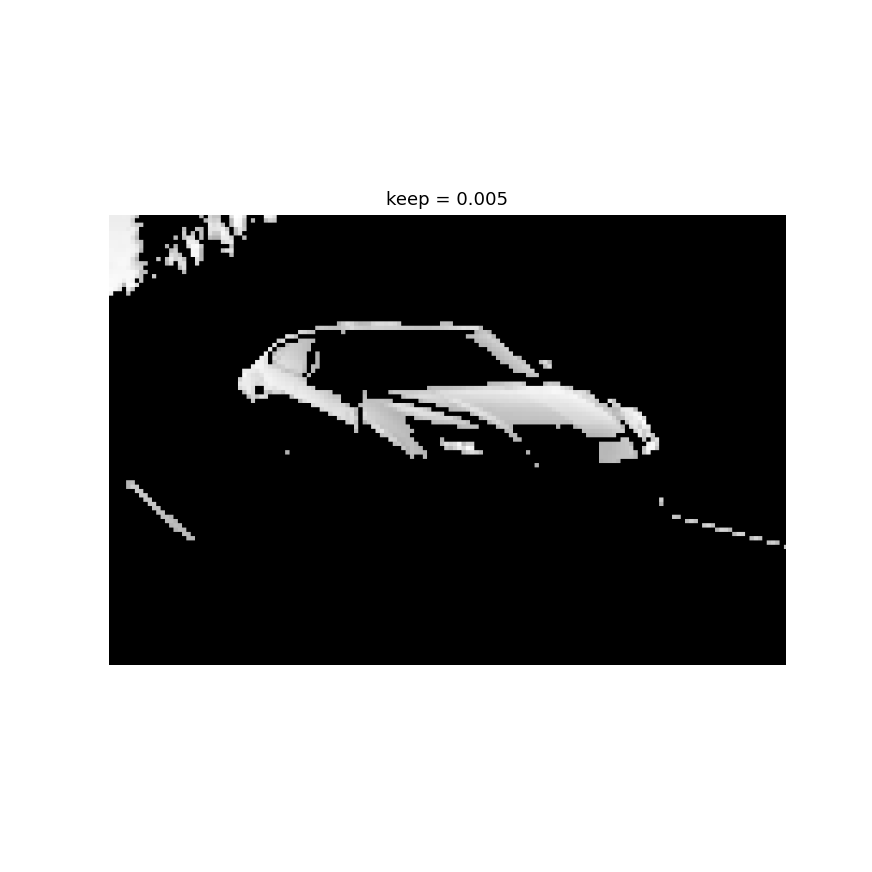

In [70]:
c_sort = np.sort(np.abs(arr.reshape(-1)))

for k in (0.5,0.1,0.05,0.01,0.005):
    
    thresh = c_sort[int(np.floor((1-k)*len(c_sort)))]
    ind = np.abs(arr) > thresh
    cfilt = arr * ind
    # obtaining new filtered coefficients
    coeffs_filt = pywt.array_to_coeffs(cfilt,coeff_slices,output_format='wavedec2')
    # Reconstructing the image to be plotted
    car = pywt.waverec2(coeffs_filt,wavelet=w)
    
    plt.figure()
    plt.imshow(car.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.rcParams['figure.figsize'] = [8,8]
    plt.title('keep = '+str(k))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 629.5, 419.5, -0.5)

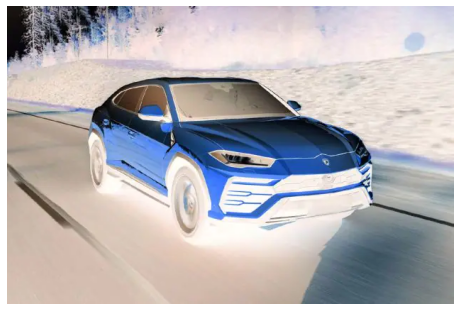

In [57]:
A = imread(os.path.join('car.webp'))
B = np.mean(A,-1)

plt.figure()
plt.imshow(256-A)
plt.axis('off')

<IPython.core.display.Javascript object>


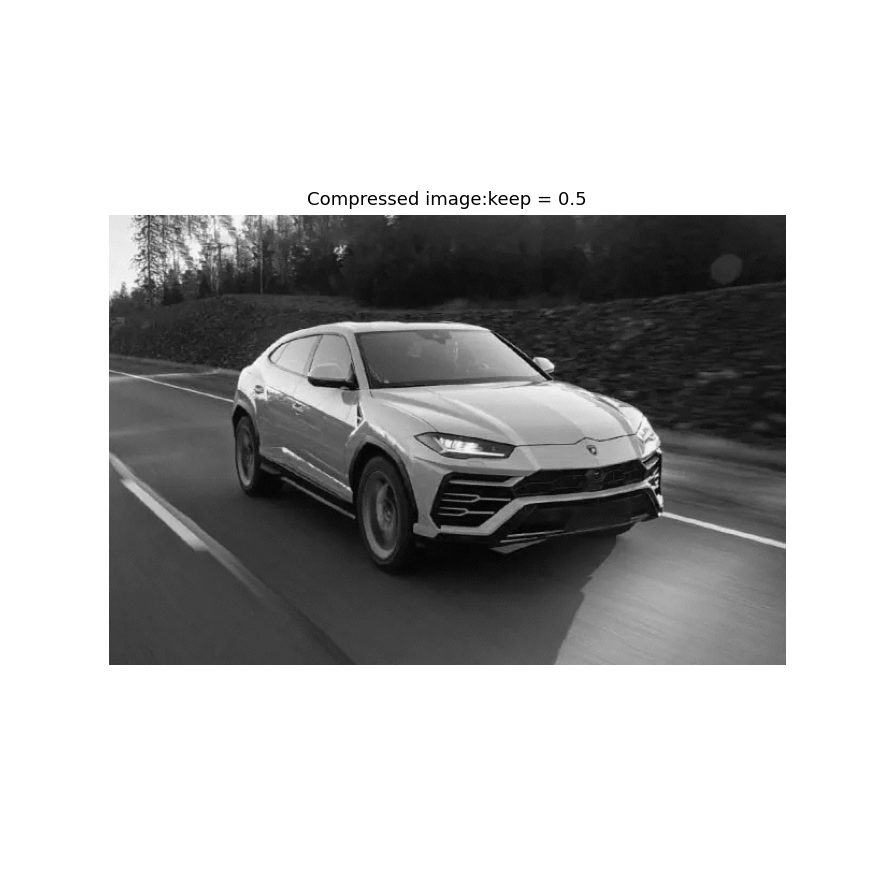

<IPython.core.display.Javascript object>


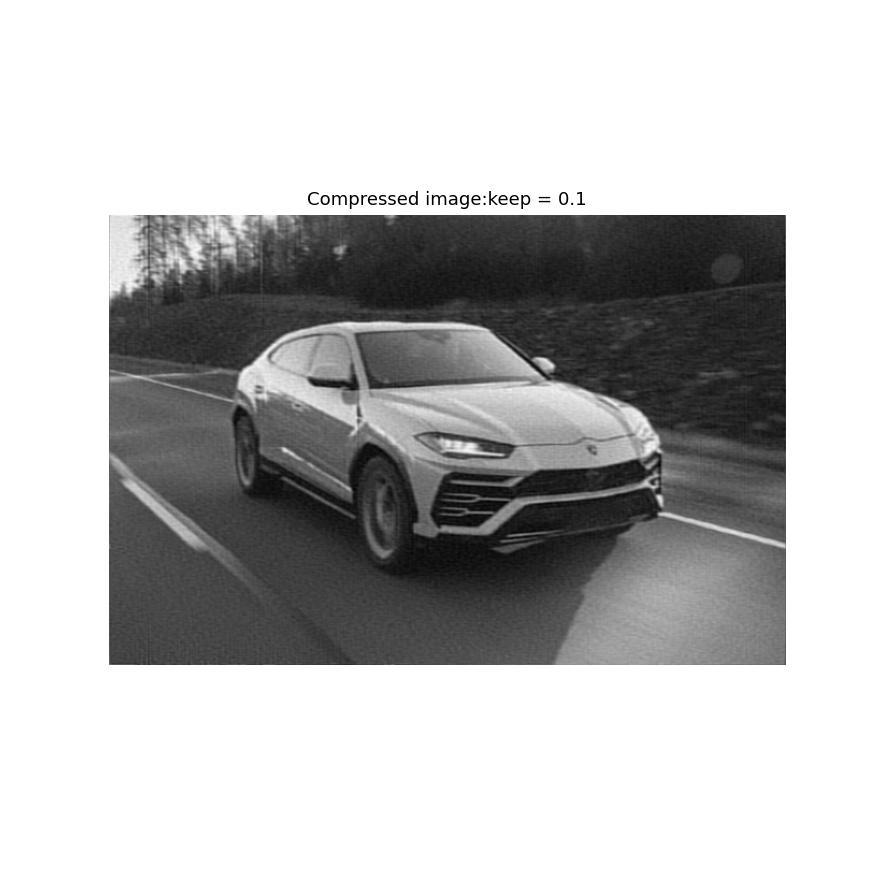

<IPython.core.display.Javascript object>


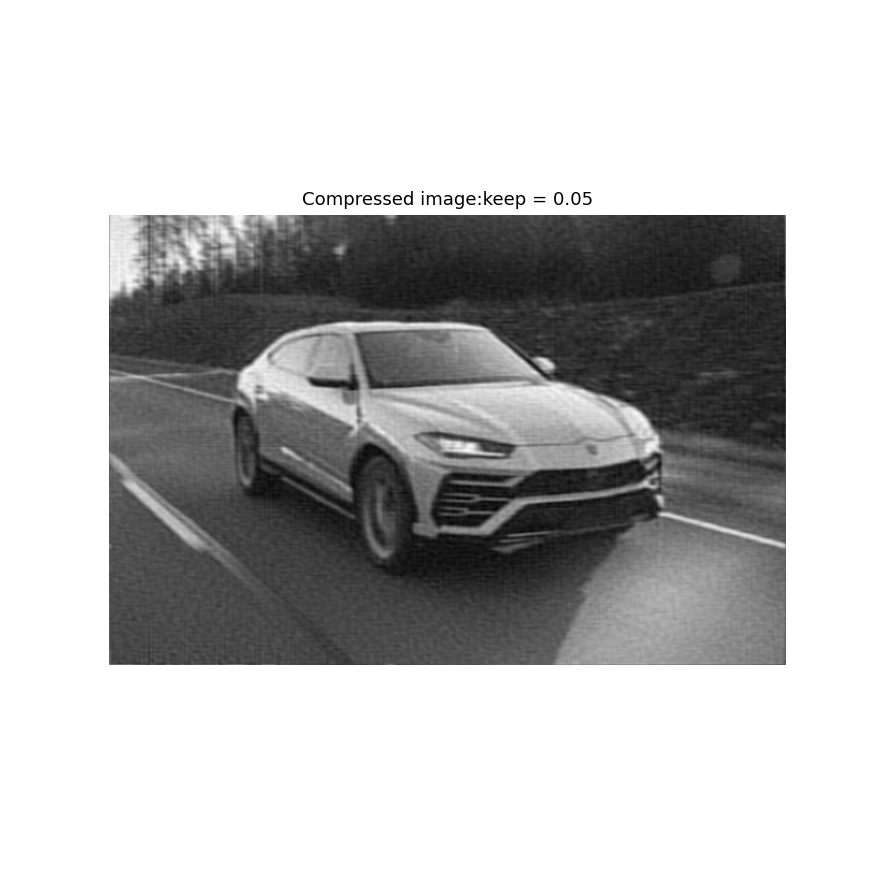

<IPython.core.display.Javascript object>


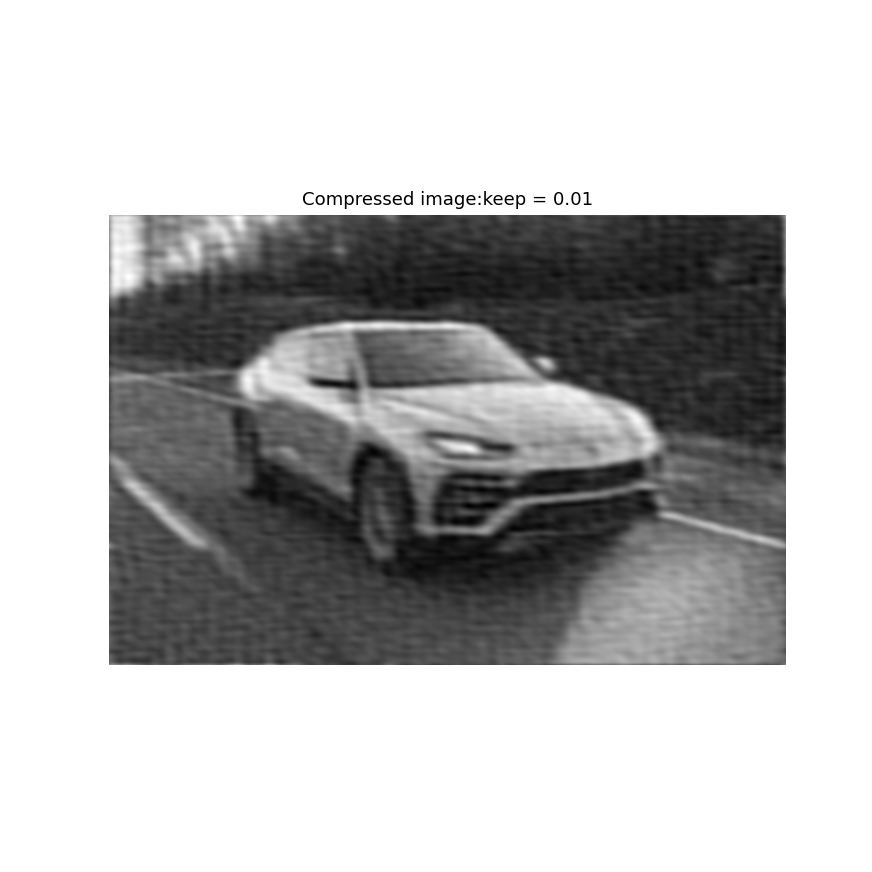

<IPython.core.display.Javascript object>


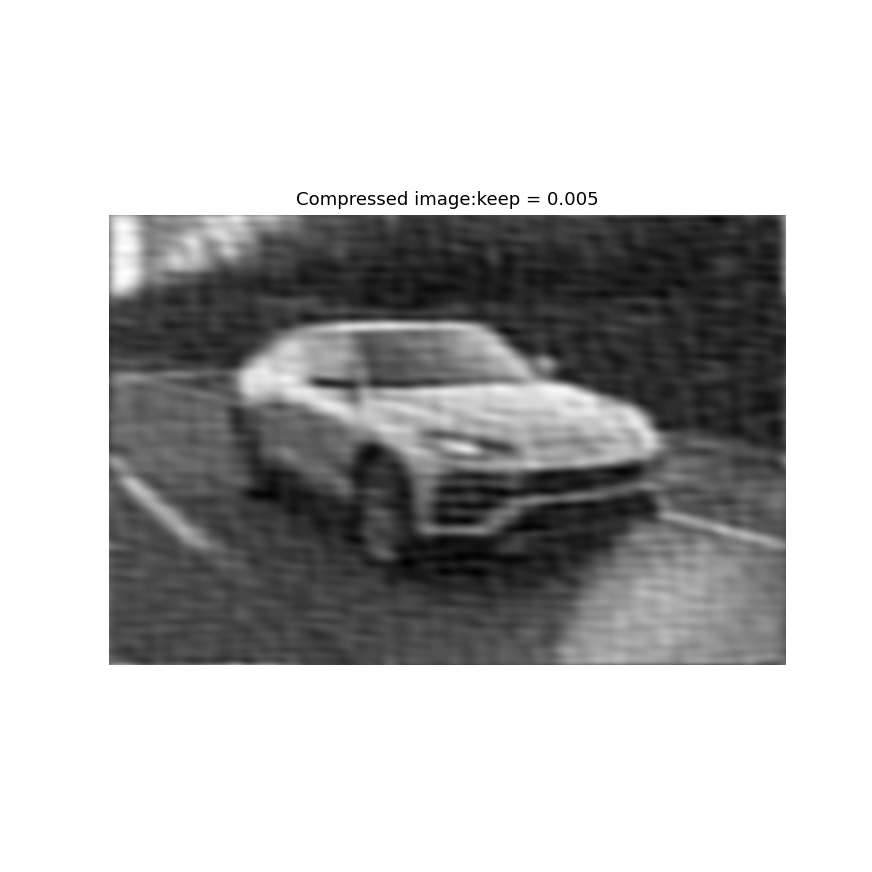

In [68]:
Bt = np.fft.fft2(B)
Bt_sort = np.sort(np.abs(Bt.reshape(-1)))

for k in (0.5,0.1,0.05,0.01,0.005):
    
    thresh = Bt_sort[int(np.floor((1-k)*len(Bt_sort)))]
    ind = np.abs(Bt) > thresh
    Atlow = Bt * ind
    # Compressed image
    Alow = np.fft.ifft2(Atlow).real
    
    plt.figure()
    plt.imshow(256-Alow,cmap='gray_r')
    plt.axis('off')
    plt.rcParams['figure.figsize'] = [8,8]
    plt.title('Compressed image:keep = '+str(k))

<IPython.core.display.Javascript object>


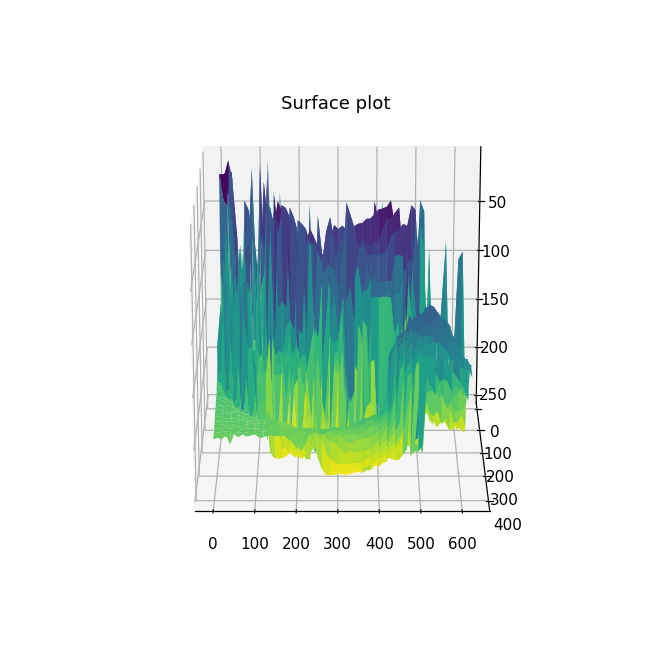

In [69]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['figure.figsize'] = [6,6]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X,Y = np.meshgrid(np.arange(1,np.shape(B)[1]+1),np.arange(1,np.shape(B)[0]+1))
ax.plot_surface(X[0::10,0::10],Y[0::10,0::10],256-B[0::10,0::10],cmap = 'viridis', edgecolor = 'none')
ax.set_title('Surface plot')
ax.mouse_init()
ax.view_init(200,270)
plt.show()